In [ ]:
pip install investpy

     |████████████████████████████████| 4.4MB 5.5MB/s 
     |████████████████████████████████| 245kB 46.3MB/s 
     |████████████████████████████████| 5.5MB 43.9MB/s 
     |████████████████████████████████| 512kB 51.0MB/s 
  Created wheel for investpy: filename=investpy-1.0.3-cp37-none-any.whl size=4466737 sha256=957742d9906a77c8f9ee3fd5fed4f95cb347087d84a98bd46994ab6938112bf2
  Stored in directory: /root/.cache/pip/wheels/ef/ef/31/cd22f970a59025c6d6dee56091b1f538d850e932697db1950e
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


In [ ]:
#Load Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime
import matplotlib.dates as mdates
import investpy
import statistics
import seaborn as sns

In [ ]:
#Import data for selected companies 
start = '01/07/2020'
end = '31/12/2020'

stock_JKH = investpy.get_stock_historical_data(stock='JKH', country='Sri Lanka', from_date = start, to_date = end)
stock_CTC = investpy.get_stock_historical_data(stock='CTC', country='Sri Lanka', from_date = start, to_date = end) 
stock_HNB = investpy.get_stock_historical_data(stock='HNB', country='Sri Lanka', from_date = start, to_date = end)
stock_DIAL = investpy.get_stock_historical_data(stock='DIAL', country='Sri Lanka', from_date = start, to_date = end)
stock_COMB = investpy.get_stock_historical_data(stock='COMB', country='Sri Lanka', from_date = start, to_date = end)
stock_SPEN = investpy.get_stock_historical_data(stock='SPEN', country='Sri Lanka', from_date = start, to_date = end)
stock_NEST = investpy.get_stock_historical_data(stock='NEST', country='Sri Lanka', from_date = start, to_date = end) 
stock_SLTL = investpy.get_stock_historical_data(stock='SLTL', country='Sri Lanka', from_date = start, to_date = end)
stock_WATA = investpy.get_stock_historical_data(stock='WATA', country='Sri Lanka', from_date = start, to_date = end)
stock_DOCK = investpy.get_stock_historical_data(stock='DOCK', country='Sri Lanka', from_date = start, to_date = end)
stock_EXPO = investpy.get_stock_historical_data(stock='EXPO', country='Sri Lanka', from_date = start, to_date = end)
stock_HHL = investpy.get_stock_historical_data(stock='HHL', country='Sri Lanka', from_date = start, to_date = end)
stock_TKYO = investpy.get_stock_historical_data(stock='TKYO', country='Sri Lanka', from_date = start, to_date = end)
stock_LION = investpy.get_stock_historical_data(stock='LION', country='Sri Lanka', from_date = start, to_date = end)
stock_LHCL = investpy.get_stock_historical_data(stock='LHCL', country='Sri Lanka', from_date = start, to_date = end)

In [ ]:
all_vals = [stock_JKH['Open'], stock_CTC['Open'], stock_HNB['Open'], stock_DIAL['Open'], stock_COMB['Open'], 
            stock_SPEN['Open'], stock_NEST['Open'], stock_SLTL['Open'], stock_WATA['Open'], stock_DOCK['Open'], 
            stock_EXPO['Open'], stock_HHL['Open'], stock_TKYO['Open'], stock_LION['Open'], stock_LHCL['Open']]

df = pd.concat(all_vals, axis=1)
df.columns = ['JKH','CTC', 'HNB', 'DIAL', 'COMB', 'SPEN', 'NEST', 'SLTL', 'WATA', 'DOCK', 'EXPO', 'HHL', 'TKYO', 'LION', 'LHCL']
df = df.dropna()

In [ ]:
# Closing price
df.head()

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
Date,,,,,,,,,,,,,,,
2020-07-01,123.0,959.5,114.0,11.5,79.0,36.0,1098.0,29.0,27.5,45.0,3.3,64.0,33.5,600.0,36.9
2020-07-02,121.0,956.0,113.0,11.3,78.0,35.7,1098.0,29.1,27.7,45.0,3.4,62.8,34.6,571.1,36.0
2020-07-06,115.5,960.0,110.1,11.2,76.5,34.0,1085.0,29.0,27.0,44.8,3.2,62.0,32.3,599.0,36.6
2020-07-08,114.5,961.0,111.0,11.5,76.5,35.5,1086.0,29.2,28.5,45.5,3.2,61.0,34.0,599.9,35.5
2020-07-09,114.0,975.0,111.0,11.4,76.6,35.0,1100.0,29.0,28.0,45.4,3.2,60.5,33.8,595.9,35.0


In [ ]:
symbols = ['JKH','CTC', 'HNB', 'DIAL', 'COMB', 'SPEN', 'NEST', 'SLTL', 'WATA', 'DOCK', 'EXPO', 'HHL', 'TKYO', 'LION', 'LHCL']

In [ ]:
# Calculate percentage change in stock prices using log for represent data as time additive values.  

returns = df.pct_change().apply(lambda x: np.log(1+x))
returns

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
Date,,,,,,,,,,,,,,,
2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,-0.016394,-0.003654,-0.008811,-0.017544,-0.012739,-0.008368,0.000000,0.003442,0.007246,0.000000,0.029853,-0.018928,0.032308,-0.049365,-0.024693
2020-07-06,-0.046520,0.004175,-0.025999,-0.008889,-0.019418,-0.048790,-0.011910,-0.003442,-0.025596,-0.004454,-0.060625,-0.012821,-0.068786,0.047697,0.016529
2020-07-08,-0.008696,0.001041,0.008141,0.026433,0.000000,0.043172,0.000921,0.006873,0.054067,0.015504,0.000000,-0.016261,0.051293,0.001501,-0.030516
2020-07-09,-0.004376,0.014463,0.000000,-0.008734,0.001306,-0.014185,0.012809,-0.006873,-0.017700,-0.002200,0.000000,-0.008230,-0.005900,-0.006690,-0.014185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,-0.013423,-0.019803,0.004008,-0.016394,-0.012579,0.050402,0.017937,-0.014859,-0.016499,-0.021506,0.063573,-0.007459,0.068529,0.003503,-0.027453
2020-12-23,-0.006780,0.019705,-0.008032,0.008230,0.006309,-0.022280,-0.017937,0.011905,0.014679,-0.021979,-0.007273,0.005333,0.012903,0.022473,0.050398
2020-12-28,0.006780,0.000098,0.012024,0.008163,-0.002519,-0.001735,0.054676,-0.008915,0.046272,-0.035052,-0.003656,0.017924,-0.037888,0.000000,0.001889


In [ ]:
#Calculating Covarient Matrix

cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
JKH,0.000258,0.000014,0.000183,0.000111,0.000166,0.000140,0.000079,0.000094,0.000186,0.000254,0.000245,0.000126,0.000233,0.000020,0.000113
CTC,0.000014,0.000139,0.000037,0.000025,-0.000008,0.000021,0.000017,0.000054,0.000076,-0.000002,-0.000005,0.000024,0.000003,-0.000018,0.000024
HNB,0.000183,0.000037,0.000361,0.000123,0.000277,0.000273,0.000052,0.000137,0.000225,0.000316,0.000245,0.000214,0.000323,0.000074,0.000123
DIAL,0.000111,0.000025,0.000123,0.000255,0.000119,0.000138,0.000048,0.000093,0.000098,0.000241,0.000206,0.000090,0.000193,-0.000023,0.000074
COMB,0.000166,-0.000008,0.000277,0.000119,0.000439,0.000261,0.000040,0.000156,0.000271,0.000363,0.000149,0.000211,0.000280,0.000080,0.000161
SPEN,0.000140,0.000021,0.000273,0.000138,0.000261,0.000951,0.000096,0.000148,0.000396,0.000373,0.000215,0.000332,0.000460,-0.000004,0.000168
NEST,0.000079,0.000017,0.000052,0.000048,0.000040,0.000096,0.000424,0.000108,0.000114,0.000122,0.000067,0.000096,0.000073,-0.000023,0.000155
SLTL,0.000094,0.000054,0.000137,0.000093,0.000156,0.000148,0.000108,0.000330,0.000173,0.000348,0.000233,0.000145,0.000207,-0.000079,0.000139
WATA,0.000186,0.000076,0.000225,0.000098,0.000271,0.000396,0.000114,0.000173,0.001282,0.000453,0.000811,0.000228,0.000565,0.000025,0.000199
DOCK,0.000254,-0.000002,0.000316,0.000241,0.000363,0.000373,0.000122,0.000348,0.000453,0.001764,0.000781,0.000454,0.000669,-0.000052,0.000266


In [ ]:
#Calculating Correlation Matrix 
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
JKH,1.000000,0.076300,0.601415,0.432460,0.492239,0.282745,0.239115,0.321926,0.323322,0.377434,0.245016,0.301479,0.382465,0.050244,0.227310
CTC,0.076300,1.000000,0.165463,0.131593,-0.032646,0.057190,0.068896,0.251499,0.180272,-0.003188,-0.006200,0.078477,0.007703,-0.063433,0.065322
HNB,0.601415,0.165463,1.000000,0.406526,0.695656,0.465311,0.133533,0.396737,0.330351,0.396656,0.207648,0.432680,0.448721,0.162028,0.209214
DIAL,0.432460,0.131593,0.406526,1.000000,0.356270,0.280768,0.147459,0.321430,0.171914,0.359607,0.207475,0.216146,0.319560,-0.059739,0.148802
COMB,0.492239,-0.032646,0.695656,0.356270,1.000000,0.404271,0.093585,0.409101,0.360667,0.412967,0.114019,0.386726,0.352130,0.157702,0.247405
SPEN,0.282745,0.057190,0.465311,0.280768,0.404271,1.000000,0.151567,0.264653,0.358924,0.287603,0.112276,0.414138,0.392949,-0.005967,0.175696
NEST,0.239115,0.068896,0.133533,0.147459,0.093585,0.151567,1.000000,0.289379,0.155285,0.141172,0.052037,0.179967,0.093989,-0.045963,0.243611
SLTL,0.321926,0.251499,0.396737,0.321430,0.409101,0.264653,0.289379,1.000000,0.265651,0.455840,0.206058,0.307001,0.300715,-0.179909,0.247299
WATA,0.323322,0.180272,0.330351,0.171914,0.360667,0.358924,0.155285,0.265651,1.000000,0.301288,0.364118,0.245180,0.416152,0.029005,0.179511
DOCK,0.377434,-0.003188,0.396656,0.359607,0.412967,0.287603,0.141172,0.455840,0.301288,1.000000,0.299025,0.415246,0.420197,-0.051562,0.204497


Text(0.5, 1.0, 'Assets Correlation Matrix')

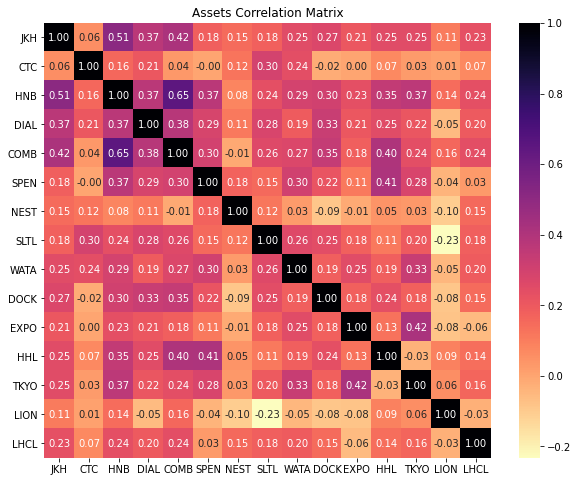

In [ ]:
#Asset Correlation Matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.pct_change().corr(method ='spearman'), ax=ax, cmap='magma_r', annot=True, fmt=".2f")
ax.set_title('Assets Correlation Matrix')

In [ ]:
#Calculating annualized expected return of each company according to the percentage of change

expected_return = df.resample('M').last().pct_change().mean()
expected_return

JKH     0.065964
CTC     0.011688
HNB     0.028058
DIAL    0.023414
COMB    0.020952
SPEN    0.117593
NEST    0.036171
SLTL    0.033083
WATA    0.165574
DOCK    0.159387
EXPO    0.541530
HHL     0.124110
TKYO    0.153836
LION   -0.004399
LHCL    0.088469
dtype: float64

In [ ]:
w_marko = [0.030101, 0.145420, 0.103473, 0.091937, 0.022719, 0.003659, 0.111587, 0.028294, 0.101163, 0.009661, 0.025190, 0.121209, 0.033716, 0.159769, 0.012102]
portfolio_er_marko = (w_marko*expected_return).sum()
portfolio_er_marko

0.06714839395737142

In [ ]:
portfolio_var_marko = cov_matrix.mul(w_marko, axis=0).mul(w_marko, axis=1).sum().sum()
portfolio_var_marko

0.0001398700612635716

In [ ]:
Sharpe_Ratio = (portfolio_er_marko-0.051) /(portfolio_var_marko**0.5)
Sharpe_Ratio

1.3654221803661362

In [ ]:
A_Sharpe = (252**0.5)*Sharpe_Ratio
A_Sharpe

21.675405143162262

In [ ]:
w_bl = [0.19350939, 0.18693763, 0.05341531, 0.09929346, 0.09389362, 0.0235263, 0.06016142, 0.05997386, 0.01128833, 0.00606597, 0.08152874, 0.04808073, 0.01897794, 0.04268007, 0.010167]
portfolio_er_bl = (w_bl*expected_return).sum()
portfolio_er_bl

0.08425189914146672

In [ ]:
portfolio_var_bl = cov_matrix.mul(w_bl, axis=0).mul(w_bl, axis=1).sum().sum()
portfolio_var_bl

0.00014238216280834846

In [ ]:
Sharpe_Ratio = (portfolio_er_bl-0.051) /(portfolio_var_bl**0.5)
Sharpe_Ratio


2.786690016527295

In [ ]:
A_Sharpe = (252**0.5)*Sharpe_Ratio
A_Sharpe

44.23733258854618